# Skin cancer lesion classification

# Importing essential libraries

In [121]:
#importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data and processing the data

In [122]:
#loading the dataset
skin_data=pd.read_csv(r"C:\Users\Desktop\archive (9)\HAM10000_metadata.csv")

In [123]:
skin_data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


# Cleaning the data

In [124]:
#checking for null values
skin_data.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [125]:
#filling the null values using mean
skin_data['age'].fillna((skin_data['age'].mean()), inplace=True)

In [126]:
skin_data.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [127]:
#importing libaries to search for the matching functions
import os
from glob import glob

In [128]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('sample/', '*', '*.jpg'))}
image_path

{'ISIC_0024306': 'sample\\HAM10000_images_part_1\\ISIC_0024306.jpg',
 'ISIC_0024307': 'sample\\HAM10000_images_part_1\\ISIC_0024307.jpg',
 'ISIC_0024308': 'sample\\HAM10000_images_part_1\\ISIC_0024308.jpg',
 'ISIC_0024309': 'sample\\HAM10000_images_part_1\\ISIC_0024309.jpg',
 'ISIC_0024310': 'sample\\HAM10000_images_part_1\\ISIC_0024310.jpg',
 'ISIC_0024311': 'sample\\HAM10000_images_part_1\\ISIC_0024311.jpg',
 'ISIC_0024312': 'sample\\HAM10000_images_part_1\\ISIC_0024312.jpg',
 'ISIC_0024313': 'sample\\HAM10000_images_part_1\\ISIC_0024313.jpg',
 'ISIC_0024314': 'sample\\HAM10000_images_part_1\\ISIC_0024314.jpg',
 'ISIC_0024315': 'sample\\HAM10000_images_part_1\\ISIC_0024315.jpg',
 'ISIC_0024316': 'sample\\HAM10000_images_part_1\\ISIC_0024316.jpg',
 'ISIC_0024317': 'sample\\HAM10000_images_part_1\\ISIC_0024317.jpg',
 'ISIC_0024318': 'sample\\HAM10000_images_part_1\\ISIC_0024318.jpg',
 'ISIC_0024319': 'sample\\HAM10000_images_part_1\\ISIC_0024319.jpg',
 'ISIC_0024320': 'sample\\HAM10000

In [129]:
#making a dictionary with the labels
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [130]:
#adding path and cell type column to the skin_data
skin_data['path'] = skin_data['image_id'].map(image_path.get)
skin_data['cell_type'] = skin_data['dx'].map(lesion_type_dict.get) 

In [131]:
#checking the shape
skin_data.shape

(10015, 9)

In [132]:
#describing the data
skin_data.describe()

,age
count,10015.000000
mean,51.863828
std,16.920252
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [133]:
#to know the information about the data
skin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   path          10015 non-null  object 
 8   cell_type     10015 non-null  object 
dtypes: float64(1), object(8)
memory usage: 704.3+ KB


# EDA

Text(0.5, 1.0, 'Frequency Distribution of Classes')

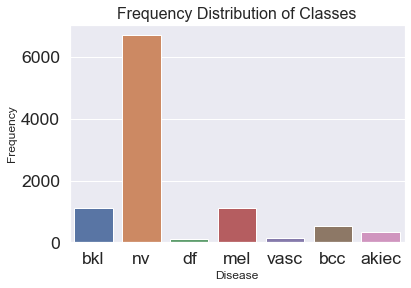

In [134]:
#plotting distibution of classes vs frequency
sns.countplot(x = 'dx', data = skin_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

Text(0.5, 1.0, 'Gender of Patient')

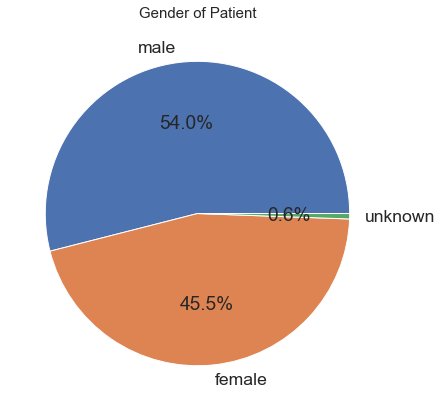

In [135]:
#pie chart for plotting sex vs patients
bar, ax = plt.subplots(figsize = (7,7))
plt.pie(skin_data['sex'].value_counts(), labels = skin_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=15)

<AxesSubplot:>

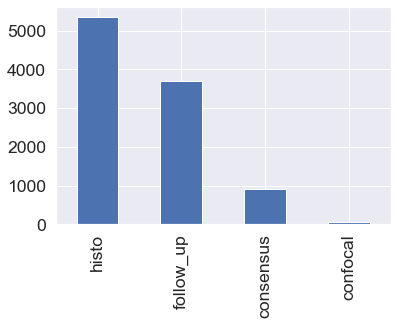

In [136]:
#to know how the data is collected vs count
skin_data['dx_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

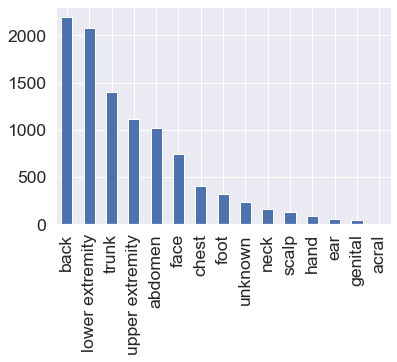

In [137]:
#plotting a graph for location of the disease vs count
skin_data['localization'].value_counts().plot(kind='bar')

<AxesSubplot:>

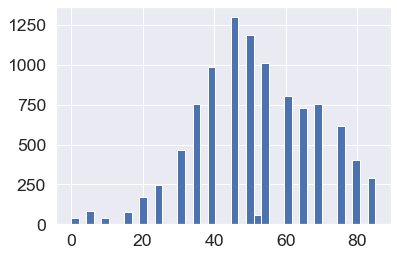

In [138]:
skin_data['age'].hist(bins=40)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

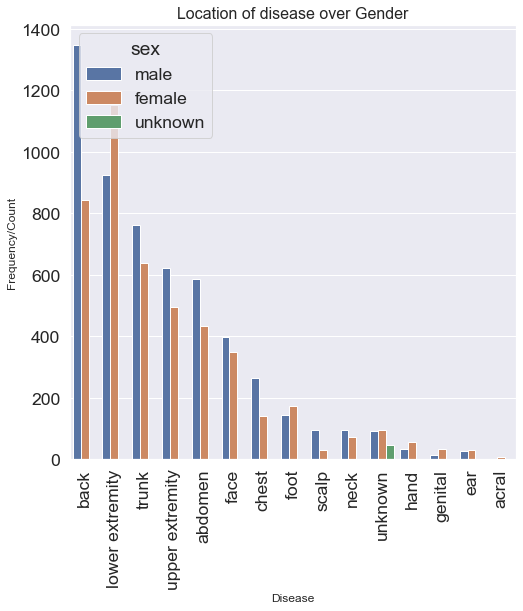

In [275]:
#to know the location of disease with respect to gender
value = skin_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (8, 8))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

In [139]:
#to get the count of different classes
skin_data['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

# Label encoding

In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(skin_data['dx'])
skin_data['label'] = le.transform(skin_data["dx"]) 

In [141]:
skin_data.sample(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,label
7794,HAM_0001908,ISIC_0033519,nv,histo,40.0,male,abdomen,sample\HAM10000_images_part_2\ISIC_0033519.jpg,Melanocytic nevi,5
518,HAM_0001979,ISIC_0027527,bkl,histo,55.0,male,face,sample\HAM10000_images_part_1\ISIC_0027527.jpg,Benign keratosis-like lesions,2
8911,HAM_0001891,ISIC_0030598,nv,histo,50.0,male,scalp,sample\HAM10000_images_part_2\ISIC_0030598.jpg,Melanocytic nevi,5
5949,HAM_0004403,ISIC_0028006,nv,follow_up,45.0,male,trunk,sample\HAM10000_images_part_1\ISIC_0028006.jpg,Melanocytic nevi,5
228,HAM_0004091,ISIC_0033587,bkl,histo,75.0,male,back,sample\HAM10000_images_part_2\ISIC_0033587.jpg,Benign keratosis-like lesions,2
9161,HAM_0000267,ISIC_0026809,nv,histo,80.0,male,lower extremity,sample\HAM10000_images_part_1\ISIC_0026809.jpg,Melanocytic nevi,5
5564,HAM_0001365,ISIC_0026307,nv,follow_up,40.0,male,lower extremity,sample\HAM10000_images_part_1\ISIC_0026307.jpg,Melanocytic nevi,5
751,HAM_0004448,ISIC_0031831,bkl,histo,70.0,male,face,sample\HAM10000_images_part_2\ISIC_0031831.jpg,Benign keratosis-like lesions,2
9867,HAM_0000688,ISIC_0026720,akiec,histo,75.0,male,lower extremity,sample\HAM10000_images_part_1\ISIC_0026720.jpg,Actinic keratoses,0
4704,HAM_0007214,ISIC_0031928,nv,follow_up,50.0,female,lower extremity,sample\HAM10000_images_part_2\ISIC_0031928.jpg,Melanocytic nevi,5


In [142]:
print(skin_data['label'].value_counts())

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64


In [143]:
#Separate each classes, resample, and combine back into single dataframe
data_0 = skin_data[skin_data['label'] == 0]
data_1 = skin_data[skin_data['label'] == 1]
data_2 = skin_data[skin_data['label'] == 2]
data_3 = skin_data[skin_data['label'] == 3]
data_4 = skin_data[skin_data['label'] == 4]
data_5 = skin_data[skin_data['label'] == 5]
data_6 = skin_data[skin_data['label'] == 6]

In [144]:
data_1

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,label
2462,HAM_0000781,ISIC_0028155,bcc,histo,50.0,male,back,sample\HAM10000_images_part_1\ISIC_0028155.jpg,Basal cell carcinoma,1
2463,HAM_0003220,ISIC_0034093,bcc,histo,80.0,female,face,sample\HAM10000_images_part_2\ISIC_0034093.jpg,Basal cell carcinoma,1
2464,HAM_0007141,ISIC_0029230,bcc,histo,50.0,male,trunk,sample\HAM10000_images_part_1\ISIC_0029230.jpg,Basal cell carcinoma,1
2465,HAM_0007141,ISIC_0031513,bcc,histo,50.0,male,trunk,sample\HAM10000_images_part_2\ISIC_0031513.jpg,Basal cell carcinoma,1
2466,HAM_0007009,ISIC_0032384,bcc,histo,50.0,male,back,sample\HAM10000_images_part_2\ISIC_0032384.jpg,Basal cell carcinoma,1
...,...,...,...,...,...,...,...,...,...,...
2971,HAM_0001573,ISIC_0028542,bcc,histo,45.0,male,chest,sample\HAM10000_images_part_1\ISIC_0028542.jpg,Basal cell carcinoma,1
2972,HAM_0001215,ISIC_0025260,bcc,histo,70.0,male,back,sample\HAM10000_images_part_1\ISIC_0025260.jpg,Basal cell carcinoma,1
2973,HAM_0001215,ISIC_0031531,bcc,histo,70.0,male,back,sample\HAM10000_images_part_2\ISIC_0031531.jpg,Basal cell carcinoma,1
2974,HAM_0005026,ISIC_0028978,bcc,histo,40.0,female,abdomen,sample\HAM10000_images_part_1\ISIC_0028978.jpg,Basal cell carcinoma,1


In [145]:
from sklearn.utils import resample

# Resampling the data

In [146]:
data_0_balanced = resample(data_0, replace=True, n_samples=500, random_state=42) 
data_1_balanced = resample(data_1, replace=True, n_samples=500, random_state=42) 
data_2_balanced = resample(data_2, replace=True, n_samples=500, random_state=42)
data_3_balanced = resample(data_3, replace=True, n_samples=500, random_state=42)
data_4_balanced = resample(data_4, replace=True, n_samples=500, random_state=42)
data_5_balanced = resample(data_5, replace=True, n_samples=500, random_state=42)
data_6_balanced = resample(data_6, replace=True, n_samples=500, random_state=42)

In [147]:
#Combined back to a single dataframe
skin_data_balanced = pd.concat([data_0_balanced, data_1_balanced, 
                              data_2_balanced, data_3_balanced, 
                              data_4_balanced, data_5_balanced, data_6_balanced])

In [148]:
skin_data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 9789 to 2363
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     3500 non-null   object 
 1   image_id      3500 non-null   object 
 2   dx            3500 non-null   object 
 3   dx_type       3500 non-null   object 
 4   age           3500 non-null   float64
 5   sex           3500 non-null   object 
 6   localization  3500 non-null   object 
 7   path          3500 non-null   object 
 8   cell_type     3500 non-null   object 
 9   label         3500 non-null   int32  
dtypes: float64(1), int32(1), object(8)
memory usage: 287.1+ KB


In [149]:
#load iamges to the dataframe
from PIL import Image
skin_data_balanced['image'] = skin_data_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))

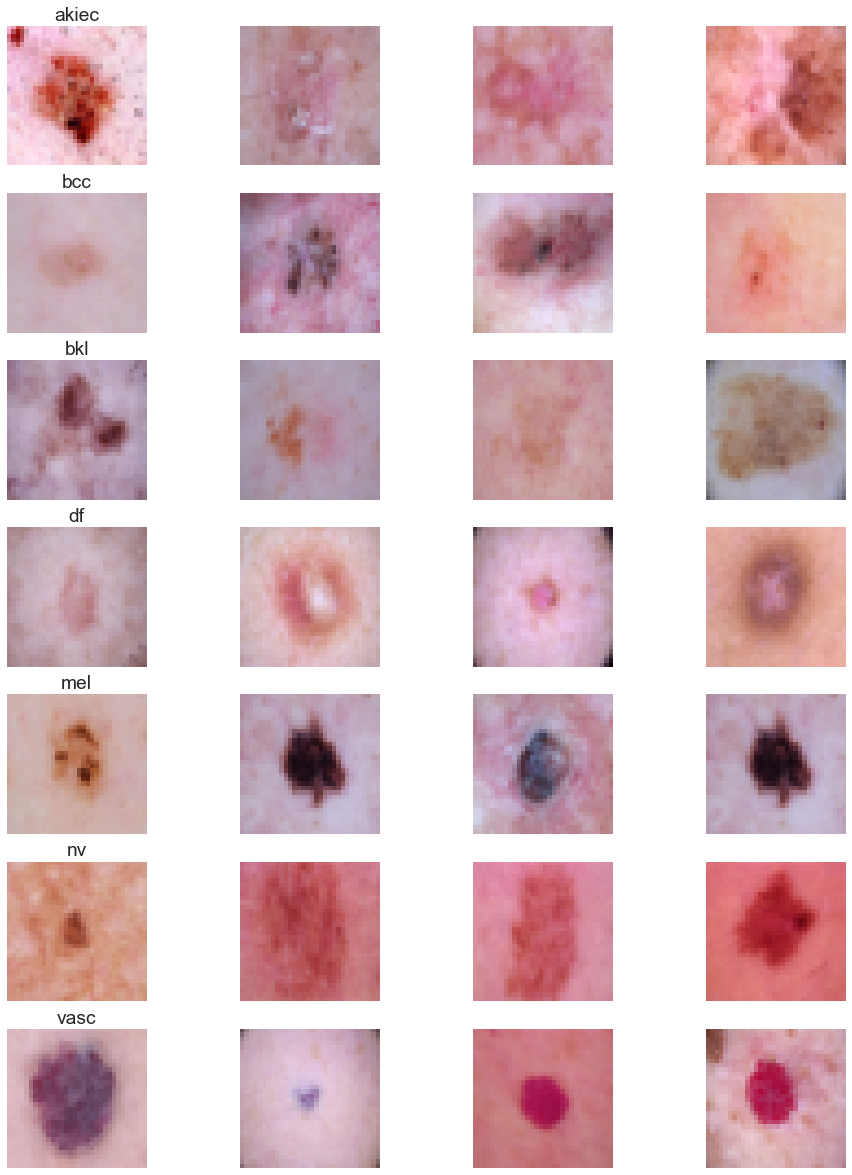

In [150]:
#Now time to read images based on image ID from the CSV file
n_samples = 4  # number of samples for plotting
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_data_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [202]:
#balanced data count for labels
skin_data_balanced['label'].value_counts()

0    500
2    500
4    500
6    500
1    500
3    500
5    500
Name: label, dtype: int64

# Data Normalization

In [203]:
#Convert dataframe column of images into numpy array
x = np.asarray(skin_data_balanced['image'].tolist())
x

array([[[[155, 118, 107],
         [162, 126, 118],
         [174, 140, 138],
         ...,
         [159, 118, 103],
         [161, 128, 120],
         [136, 110, 104]],

        [[147, 107,  93],
         [156, 117, 105],
         [170, 133, 128],
         ...,
         [172, 133, 121],
         [176, 143, 133],
         [172, 145, 139]],

        [[165, 131, 123],
         [156, 115, 100],
         [156, 113, 103],
         ...,
         [172, 133, 117],
         [167, 130, 113],
         [161, 129, 123]],

        ...,

        [[144, 108,  90],
         [150, 115,  95],
         [155, 119,  99],
         ...,
         [182, 148, 137],
         [182, 149, 137],
         [184, 155, 147]],

        [[144, 109,  88],
         [149, 114,  95],
         [153, 116,  96],
         ...,
         [181, 145, 133],
         [186, 155, 145],
         [182, 155, 149]],

        [[141, 105,  86],
         [144, 107,  88],
         [150, 113,  93],
         ...,
         [179, 146, 133],
        

In [204]:
type(x)

numpy.ndarray

In [205]:
y=skin_data_balanced['label']
type(y)

pandas.core.series.Series

In [206]:
# Scale values to 0-1. You can also used standardscaler or other scaling methods.
x = x/255
x

array([[[[0.60784314, 0.4627451 , 0.41960784],
         [0.63529412, 0.49411765, 0.4627451 ],
         [0.68235294, 0.54901961, 0.54117647],
         ...,
         [0.62352941, 0.4627451 , 0.40392157],
         [0.63137255, 0.50196078, 0.47058824],
         [0.53333333, 0.43137255, 0.40784314]],

        [[0.57647059, 0.41960784, 0.36470588],
         [0.61176471, 0.45882353, 0.41176471],
         [0.66666667, 0.52156863, 0.50196078],
         ...,
         [0.6745098 , 0.52156863, 0.4745098 ],
         [0.69019608, 0.56078431, 0.52156863],
         [0.6745098 , 0.56862745, 0.54509804]],

        [[0.64705882, 0.51372549, 0.48235294],
         [0.61176471, 0.45098039, 0.39215686],
         [0.61176471, 0.44313725, 0.40392157],
         ...,
         [0.6745098 , 0.52156863, 0.45882353],
         [0.65490196, 0.50980392, 0.44313725],
         [0.63137255, 0.50588235, 0.48235294]],

        ...,

        [[0.56470588, 0.42352941, 0.35294118],
         [0.58823529, 0.45098039, 0.37254902]

In [207]:
#to get the shape of image
x.shape

(3500, 32, 32, 3)

In [208]:
#to get the shape of label
y.shape

(3500,)

In [209]:
y

9789    0
9957    0
9793    0
9758    0
9875    0
       ..
2375    6
2436    6
2453    6
2377    6
2363    6
Name: label, Length: 3500, dtype: int32

In [210]:
#Convert to categorical as this is a multiclass classification problem
from keras.utils.np_utils import to_categorical 
y_cat = to_categorical(y, num_classes=7)
y_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [211]:
#splitting the dataset into train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.25, random_state=42)

In [212]:
print(x_train.shape)
print(x_test.shape)

(2625, 32, 32, 3)
(875, 32, 32, 3)


# Model building

# CNN

In [213]:
#importing essential libraries for modelling the data with CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

In [214]:
num_classes = 7
model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(32, 32, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 256)      0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 15, 15, 256)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 6, 6, 128)        

In [215]:
#specify the batch size and epoch size
batch_size = 16 
epochs = 80

In [216]:
#model fitting
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

Epoch 1/80
165/165 - 10s - loss: 1.9260 - acc: 0.1790 - val_loss: 1.8230 - val_acc: 0.2411 - 10s/epoch - 62ms/step
Epoch 2/80
165/165 - 10s - loss: 1.7369 - acc: 0.2804 - val_loss: 1.6353 - val_acc: 0.3474 - 10s/epoch - 60ms/step
Epoch 3/80
165/165 - 10s - loss: 1.5477 - acc: 0.3615 - val_loss: 1.5123 - val_acc: 0.4137 - 10s/epoch - 59ms/step
Epoch 4/80
165/165 - 10s - loss: 1.4898 - acc: 0.3810 - val_loss: 1.4218 - val_acc: 0.4583 - 10s/epoch - 60ms/step
Epoch 5/80
165/165 - 11s - loss: 1.4094 - acc: 0.4328 - val_loss: 1.4474 - val_acc: 0.4034 - 11s/epoch - 65ms/step
Epoch 6/80
165/165 - 11s - loss: 1.3832 - acc: 0.4358 - val_loss: 1.3671 - val_acc: 0.4354 - 11s/epoch - 65ms/step
Epoch 7/80
165/165 - 11s - loss: 1.3080 - acc: 0.4667 - val_loss: 1.4527 - val_acc: 0.4091 - 11s/epoch - 69ms/step
Epoch 8/80
165/165 - 12s - loss: 1.3632 - acc: 0.4533 - val_loss: 1.3019 - val_acc: 0.4789 - 12s/epoch - 70ms/step
Epoch 9/80
165/165 - 11s - loss: 1.2676 - acc: 0.5101 - val_loss: 1.2122 - val_a

In [256]:
#to know the accuracy of the model
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

28/28 [==============================] - 1s 25ms/step - loss: 0.7258 - acc: 0.7749
Test accuracy: 0.7748571634292603


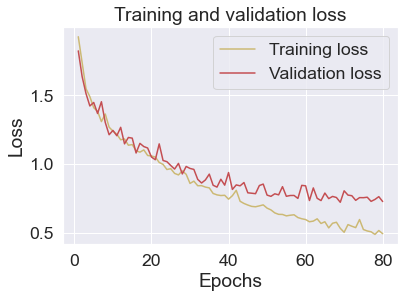

In [257]:
#plot the training and validation loss at each epoch
from scipy import stats
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

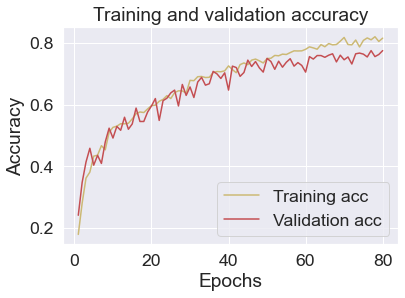

In [258]:
#plot the training and validation accuracy at each epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [259]:
# Prediction on test data
y_pred = model.predict(x_test)

In [260]:
y_pred

array([[2.0570440e-02, 1.7688718e-02, 8.4040686e-03, ..., 8.8028994e-04,
        1.2726613e-03, 1.8320388e-04],
       [2.8410623e-02, 2.4849312e-01, 6.9080496e-01, ..., 2.2613831e-02,
        5.6977416e-03, 1.8584245e-04],
       [7.1933530e-03, 5.0684853e-06, 2.4692725e-02, ..., 9.6793550e-01,
        1.7342702e-04, 2.5625408e-11],
       ...,
       [3.2715963e-03, 6.4763403e-04, 3.1225765e-01, ..., 2.4166611e-01,
        4.4178265e-01, 3.3185918e-07],
       [1.5285894e-18, 9.1355270e-09, 1.1240355e-13, ..., 7.8656649e-16,
        1.7137984e-10, 1.0000000e+00],
       [2.6087970e-02, 2.1376884e-01, 1.5377231e-01, ..., 4.2311229e-02,
        3.7639853e-01, 3.5570839e-03]], dtype=float32)

In [261]:
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)

In [262]:
y_pred_classes

array([3, 2, 4, 3, 0, 4, 3, 3, 2, 0, 3, 2, 6, 1, 1, 1, 0, 3, 6, 5, 0, 3,
       2, 3, 2, 4, 1, 2, 3, 6, 6, 3, 4, 1, 6, 6, 0, 0, 1, 4, 3, 6, 1, 2,
       0, 0, 3, 3, 1, 0, 0, 2, 4, 6, 0, 0, 4, 0, 2, 3, 6, 5, 1, 0, 3, 6,
       0, 3, 0, 5, 5, 1, 2, 2, 1, 2, 6, 5, 6, 3, 6, 6, 6, 6, 5, 5, 2, 5,
       0, 1, 2, 6, 1, 5, 6, 4, 0, 2, 3, 1, 0, 4, 1, 2, 0, 0, 6, 6, 3, 1,
       0, 1, 0, 1, 4, 6, 6, 3, 5, 3, 1, 5, 6, 2, 1, 1, 4, 3, 1, 0, 3, 0,
       0, 6, 5, 4, 6, 6, 1, 3, 2, 6, 0, 3, 5, 5, 2, 0, 2, 0, 0, 4, 4, 1,
       5, 1, 1, 3, 0, 3, 0, 2, 2, 5, 5, 1, 1, 4, 4, 1, 3, 2, 2, 2, 3, 6,
       1, 5, 0, 6, 6, 2, 2, 0, 2, 2, 2, 3, 3, 5, 5, 5, 6, 2, 4, 6, 4, 3,
       2, 0, 2, 0, 3, 2, 0, 5, 5, 6, 6, 4, 2, 0, 6, 6, 6, 6, 2, 5, 5, 0,
       0, 1, 1, 1, 4, 3, 6, 2, 1, 3, 4, 3, 1, 6, 1, 3, 5, 3, 0, 1, 1, 0,
       1, 4, 3, 3, 0, 1, 6, 3, 2, 6, 3, 0, 1, 3, 5, 2, 1, 3, 2, 0, 0, 2,
       6, 4, 1, 5, 0, 0, 6, 0, 0, 1, 1, 0, 0, 6, 5, 3, 2, 3, 0, 6, 0, 6,
       0, 4, 1, 6, 1, 1, 3, 2, 4, 4, 5, 1, 0, 3, 3,

In [263]:
# Convert predictions classes to one hot vectors
y_true = np.argmax(y_test, axis = 1)

In [264]:
y_true

array([3, 4, 4, 3, 0, 4, 3, 3, 2, 0, 3, 5, 6, 1, 1, 1, 1, 2, 6, 5, 0, 3,
       0, 3, 2, 2, 1, 0, 3, 6, 6, 3, 4, 1, 6, 6, 0, 0, 1, 4, 3, 6, 1, 4,
       4, 0, 3, 3, 1, 0, 0, 0, 5, 6, 2, 0, 2, 0, 4, 3, 6, 2, 1, 0, 3, 6,
       0, 3, 1, 5, 5, 1, 0, 2, 1, 4, 6, 5, 6, 3, 6, 6, 6, 6, 5, 5, 2, 5,
       0, 0, 4, 6, 1, 5, 6, 5, 0, 2, 3, 1, 0, 4, 2, 2, 0, 0, 6, 6, 1, 0,
       0, 1, 2, 1, 4, 1, 6, 1, 5, 3, 1, 5, 6, 2, 1, 1, 4, 3, 1, 0, 3, 0,
       0, 6, 4, 4, 6, 6, 1, 0, 2, 6, 4, 3, 5, 5, 4, 1, 2, 0, 0, 4, 4, 1,
       5, 2, 0, 3, 0, 3, 5, 5, 0, 5, 2, 1, 2, 4, 4, 3, 3, 1, 0, 2, 3, 6,
       1, 5, 1, 6, 6, 2, 0, 0, 2, 1, 2, 3, 3, 5, 4, 5, 6, 2, 4, 6, 4, 3,
       2, 2, 2, 0, 3, 2, 0, 5, 5, 6, 6, 4, 4, 0, 6, 6, 6, 6, 2, 5, 5, 5,
       2, 1, 0, 1, 5, 3, 6, 2, 3, 3, 4, 3, 1, 6, 1, 3, 2, 3, 0, 1, 1, 0,
       1, 5, 3, 3, 4, 1, 6, 3, 2, 6, 3, 0, 1, 3, 5, 2, 1, 3, 2, 0, 0, 5,
       6, 4, 1, 4, 0, 0, 6, 1, 0, 1, 0, 0, 0, 6, 5, 3, 2, 3, 0, 6, 0, 1,
       0, 4, 1, 6, 5, 1, 0, 0, 4, 5, 5, 1, 0, 3, 0,

In [265]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_classes)

In [266]:
cm

array([[114,  16,  14,   5,   0,   0,   0],
       [ 15,  89,  12,   5,   1,   2,   4],
       [  9,   7,  81,   2,   8,  13,   0],
       [  0,   6,   0, 122,   0,   0,   0],
       [ 11,   3,   9,   0,  69,  20,   0],
       [  4,   4,  11,   0,  16,  78,   0],
       [  0,   0,   0,   0,   0,   0, 125]], dtype=int64)

<AxesSubplot:>

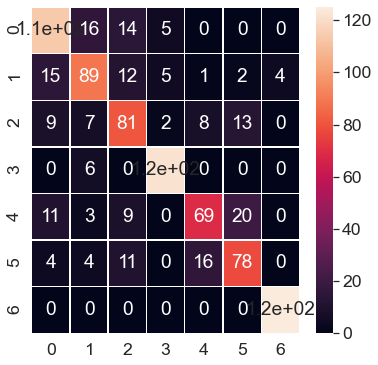

In [267]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

Text(0, 0.5, 'Fraction of incorrect predictions')

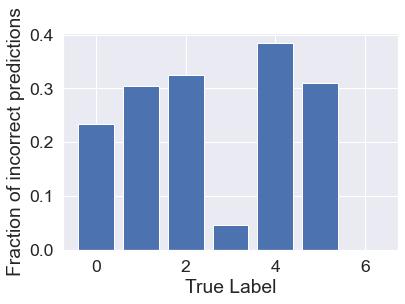

In [268]:
#PLot fractional incorrect misclassifications
np.random.seed(42)

incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

# Result:This model has maximum number of correct prediction for label 6 ie,vascular lesion and the model shows maximum incorrect prediction for label 4 which is melanoma

# The overall accuracy for CNN is 77.4%

In [279]:
#to do logistic regression change the image dimension to 2D
X = np.asarray([img.ravel() for img in skin_data_balanced['image'].tolist()])

In [282]:
X.shape

(3500, 3072)

In [284]:
x.shape

(3500, 32, 32, 3)

In [286]:
X_train.shape

(2625, 32, 32, 3)

In [300]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.75      0.77      0.75       149
           1       0.71      0.70      0.70       128
           2       0.64      0.68      0.66       120
           3       0.91      0.95      0.93       128
           4       0.73      0.62      0.67       112
           5       0.69      0.69      0.69       113
           6       0.97      1.00      0.98       125

    accuracy                           0.77       875
   macro avg       0.77      0.77      0.77       875
weighted avg       0.77      0.77      0.77       875



# Logistic regression

In [287]:
#splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [288]:
#fitting the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

In [293]:
#importing certain to know the accuracy of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy_score(Y_pred,Y_test)

0.728

In [294]:
Y_pred

array([3, 6, 4, 3, 0, 4, 3, 3, 2, 0, 3, 4, 6, 2, 1, 3, 3, 1, 6, 5, 0, 3,
       5, 3, 4, 4, 1, 2, 3, 6, 6, 3, 4, 1, 6, 6, 0, 0, 0, 4, 3, 6, 1, 3,
       5, 0, 3, 3, 1, 4, 0, 1, 4, 6, 2, 0, 3, 0, 5, 3, 6, 5, 1, 0, 3, 6,
       0, 3, 5, 5, 5, 1, 2, 2, 6, 5, 6, 4, 6, 3, 6, 5, 6, 6, 5, 5, 2, 5,
       1, 0, 2, 6, 1, 5, 6, 0, 0, 2, 3, 1, 0, 4, 2, 2, 1, 0, 6, 6, 1, 0,
       0, 1, 0, 4, 4, 1, 6, 4, 5, 3, 1, 2, 6, 2, 1, 1, 4, 3, 1, 0, 3, 0,
       0, 6, 5, 2, 6, 6, 1, 2, 5, 6, 1, 3, 5, 5, 4, 1, 5, 0, 0, 4, 0, 2,
       5, 1, 0, 3, 6, 3, 0, 2, 1, 5, 1, 1, 6, 4, 4, 3, 3, 1, 5, 2, 3, 6,
       1, 5, 2, 6, 6, 2, 5, 0, 2, 0, 1, 3, 3, 5, 4, 5, 6, 5, 4, 6, 2, 3,
       2, 4, 2, 0, 3, 2, 0, 5, 5, 6, 6, 3, 2, 0, 6, 6, 6, 6, 2, 0, 5, 4,
       2, 1, 3, 1, 2, 3, 6, 3, 1, 3, 4, 3, 1, 6, 1, 3, 2, 3, 0, 1, 1, 0,
       1, 4, 3, 3, 2, 1, 6, 3, 2, 6, 3, 0, 1, 3, 5, 0, 1, 3, 2, 0, 3, 5,
       6, 4, 1, 5, 0, 3, 6, 0, 0, 1, 0, 0, 0, 6, 5, 3, 5, 3, 3, 6, 0, 1,
       0, 4, 1, 6, 2, 1, 5, 1, 5, 5, 1, 1, 0, 3, 0,

In [295]:
Y_test

1142     3
1702     4
1237     4
1161     3
9874     0
        ..
10000    0
9873     0
1665     4
2400     6
642      2
Name: label, Length: 875, dtype: int32

In [297]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y_pred,Y_test)

<AxesSubplot:>

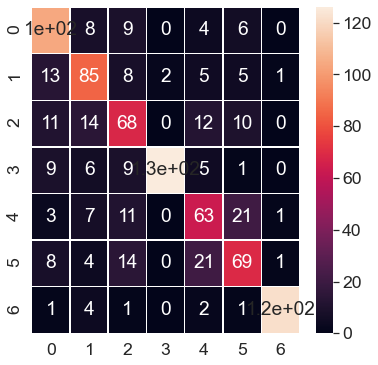

In [298]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(CM, annot=True, linewidths=.5, ax=ax)

Text(0, 0.5, 'Fraction of incorrect predictions')

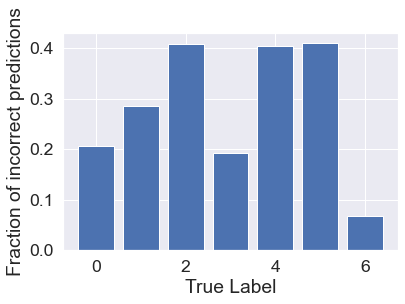

In [299]:
incorr_fraction = 1 - np.diag(CM) / np.sum(CM, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

# Result:This model has maximum number of correct prediction for label 6 ie,vascular lesion and the model shows maximum number of incorrect prediction for label 5 which is Melanocytic nevi.

# The overall accuracy for CNN is 72%

# Comparing the two models CNN is the best model but the accuracy can be increased by further tuning of the model

In [301]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       149
           1       0.71      0.66      0.69       128
           2       0.59      0.57      0.58       120
           3       0.81      0.98      0.89       128
           4       0.59      0.56      0.58       112
           5       0.59      0.61      0.60       113
           6       0.93      0.98      0.95       125

    accuracy                           0.73       875
   macro avg       0.72      0.72      0.72       875
weighted avg       0.72      0.73      0.72       875

